In [2]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [3]:
import sys
sys.path.insert(0, jaxqualin_path)

In [4]:
import QuasinormalMode
from QuasinormalMode import *
import Waveforms
from Waveforms import *
import Fit
from Fit import *
import utils
from utils import *
import plot
from plot import *
import ModeSelection
from ModeSelection import *
import configparser
import argparse

ROOT_PATH = jaxqualin_path
CONFIG_PATH = os.path.join(ROOT_PATH, "config")
PLOT_PATH = os.path.join(ROOT_PATH, "plots/CCE_compare")

2023-09-01 12:07:43.722193: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-01 12:07:43.762532: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-01 12:07:43.765450: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [5]:
from importlib import reload
reload(QuasinormalMode)
from QuasinormalMode import *
reload(plot)
from plot import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
SXS_companion = {"0001" : "0389",
                 "0010" : "1220"}

In [7]:
CCE_num = '0001'
setting_name = 'normal2'
load_pickle = True
mode_searcher_load_pickle = True
CCE = True

config_file_path = os.path.join(CONFIG_PATH, f"{setting_name}.ini")
config = configparser.ConfigParser()
config.optionxform = str

config.read(config_file_path)
config_sections = config._sections
kwargs = config_sections['basic']
flatness_checker_kwargs = config_sections['flatness_checker']
mode_searcher_kwargs = config_sections['mode_searcher']
for key in kwargs:
    kwargs[key] = eval(kwargs[key])
for key in flatness_checker_kwargs:
    flatness_checker_kwargs[key] = eval(flatness_checker_kwargs[key])
for key in mode_searcher_kwargs:
    mode_searcher_kwargs[key] = eval(mode_searcher_kwargs[key])

kwargs.update(flatness_checker_kwargs = flatness_checker_kwargs,
               mode_searcher_kwargs = mode_searcher_kwargs)
    
mode_search_complete_CCE = ModeSearchAllFreeVaryingNSXSAllRelevant(
                                                    CCE_num, 
                                                    load_pickle = load_pickle, 
                                                    mode_searcher_load_pickle = mode_searcher_load_pickle,
                                                    postfix_string = setting_name,
                                                    pickle_in_scratch = True,
                                                    CCE = True,
                                                    **kwargs
                                                              )

2023-09-01 12:07:53.714125: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
mode_search_complete_CCE.do_all_searches()

reloaded lm = 2.2 from an old run.
reloaded lm = 2.0 from an old run.
reloaded lm = 3.2 from an old run.
reloaded lm = 4.4 from an old run.
reloaded lm = 6.6 from an old run.


In [100]:
relevant_lm_list_CCE = mode_search_complete_CCE.relevant_lm_list
l, m = 4, 4
lm_indx_CCE = relevant_lm_list_CCE.index((l,m))

In [101]:
mode_searcher_vary_N_CCE = mode_search_complete_CCE.relevant_lm_mode_searcher_varying_N[lm_indx_CCE].mode_searcher_vary_N
passed_modes_len = 0
for i, mode_searcher in enumerate(mode_searcher_vary_N_CCE.mode_searchers):
    passed_modes_len_i = len(mode_searcher.mode_selector.passed_mode_list)
    if passed_modes_len_i > passed_modes_len:
        passed_modes_len = passed_modes_len_i
        best_run_indx_CCE = i
h_CCE = mode_searcher_vary_N_CCE.h
t0_arr_CCE = mode_searcher_vary_N_CCE.t0_arr
best_mode_searcher_CCE = mode_searcher_vary_N_CCE.mode_searchers[best_run_indx_CCE]
N_free_CCE = best_mode_searcher_CCE.N_init
found_modes_CCE = best_mode_searcher_CCE.found_modes
passed_modes_CCE = best_mode_searcher_CCE.mode_selector.passed_mode_list

In [102]:
run_string_prefix_CCE = f"CCE{CCE_num}_lm_{l}.{m}"
N_fixed_CCE = len(found_modes_CCE)
fitter_CCE_fixed = QNMFitVaryingStartingTime(
                            h_CCE, t0_arr_CCE, N_free = 0,
                            qnm_fixed_list = found_modes_CCE, load_pickle = True,
                            run_string_prefix = run_string_prefix_CCE, random_initial = True,
                            initial_num = 10)

In [103]:
fitter_CCE_fixed.do_fits()
result_CCE_fixed = fitter_CCE_fixed.result_full

reloaded fit CCE0001_lm_4.4_N_0_fix_2.2.0x2.2.0_4.4.0_5.4.0_constant_t0_0.0000_50.0000_501 from an old run.


In [104]:
fitter_CCE_free = QNMFitVaryingStartingTime(
                            h_CCE, t0_arr_CCE, N_free = N_free_CCE,
                            qnm_fixed_list = [], load_pickle = True,
                            run_string_prefix = run_string_prefix_CCE, random_initial = True,
                            initial_num = 10)

In [105]:
fitter_CCE_free.do_fits()
result_CCE_free = fitter_CCE_free.result_full

reloaded fit CCE0001_lm_4.4_N_6_t0_0.0000_50.0000_501 from an old run.


In [106]:
present_modes_CCE = [found_modes.string() for found_modes in found_modes_CCE]

Text(0.08, 0.95, '$N_f = 6$')

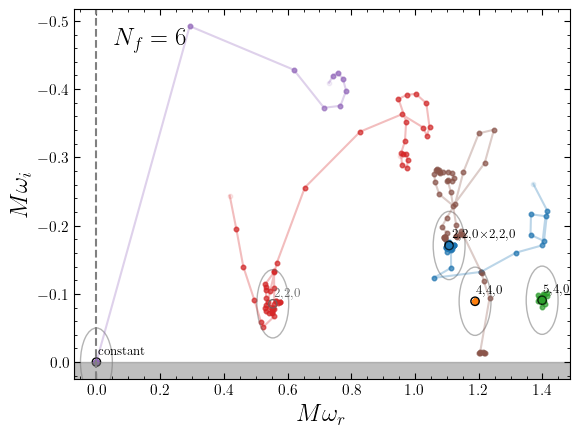

In [107]:
fig, ax = plt.subplots()
plot_omega_free(result_CCE_free, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = False)
plot_predicted_qnms(ax, 
                    passed_modes_CCE,
                    [],
                    ellipse_qnm_list=passed_modes_CCE,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = present_modes_CCE,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )
ax.text(0.08, 0.95, f"$N_f = {N_free_CCE}$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

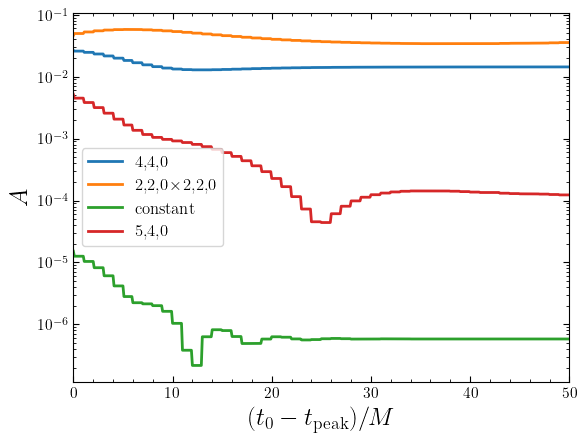

In [108]:
plot_amplitudes(fitter_CCE_fixed.result_full, fixed_modes = found_modes_CCE)

In [109]:
SXS_num = SXS_companion[CCE_num]

In [110]:
mode_search_complete_SXS = ModeSearchAllFreeVaryingNSXSAllRelevant(
                                                    SXS_num, 
                                                    load_pickle = load_pickle, 
                                                    mode_searcher_load_pickle = mode_searcher_load_pickle,
                                                    postfix_string = setting_name,
                                                    pickle_in_scratch = True,
                                                    CCE = False,
                                                    **kwargs
                                                              )

Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following

In [111]:
mode_search_complete_SXS.relevant_lm_mode_searcher_varying_N[0].file_path

'/expanse/lustre/scratch/mcheung1/temp_project/Ringdown/jaxqualin/pickle/mode_searchers/ModeSearcher_SXS0389_lm_2.2_N_5_6_7_8_9_10_normal2.pickle'

In [112]:
mode_search_complete_SXS.do_all_searches()

reloaded lm = 2.2 from an old run.
reloaded lm = 3.2 from an old run.
reloaded lm = 4.4 from an old run.
reloaded lm = 2.0 from an old run.
reloaded lm = 6.6 from an old run.


In [113]:
relevant_lm_list_SXS = mode_search_complete_SXS.relevant_lm_list
lm_indx_SXS = relevant_lm_list_SXS.index((l,m))

In [114]:
mode_searcher_vary_N_SXS = mode_search_complete_SXS.relevant_lm_mode_searcher_varying_N[lm_indx_SXS].mode_searcher_vary_N
passed_modes_len = 0
for i, mode_searcher in enumerate(mode_searcher_vary_N_SXS.mode_searchers):
    passed_modes_len_i = len(mode_searcher.mode_selector.passed_mode_list)
    if passed_modes_len_i > passed_modes_len:
        passed_modes_len = passed_modes_len_i
        best_run_indx_SXS = i

h_SXS, Mf_SXS, af_SXS, Level_SXS, retro_SXS = get_waveform_SXS(SXS_num, l, m)

t0_arr_SXS = mode_searcher_vary_N_SXS.t0_arr
best_mode_searcher_SXS = mode_searcher_vary_N_SXS.mode_searchers[best_run_indx_SXS]
N_free_SXS = best_mode_searcher_SXS.N_init
found_modes_SXS = best_mode_searcher_SXS.found_modes
passed_modes_SXS = best_mode_searcher_SXS.mode_selector.passed_mode_list

Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json


In [115]:
run_string_prefix_SXS = f"SXS{SXS_num}_lm_{l}.{m}"
N_fixed_SXS = len(found_modes_SXS)
fitter_SXS_fixed = QNMFitVaryingStartingTime(
                            h_SXS, t0_arr_SXS, N_free = 0,
                            qnm_fixed_list = found_modes_SXS, load_pickle = True,
                            run_string_prefix = run_string_prefix_SXS, random_initial = True,
                            initial_num = 10)

In [116]:
fitter_SXS_fixed.do_fits()
result_SXS_fixed = fitter_SXS_fixed.result_full

reloaded fit SXS0389_lm_4.4_N_0_fix_2.2.0_2.2.0x2.2.0_4.4.0_4.4.1_5.4.0_t0_0.0000_50.0000_501 from an old run.


In [117]:
fitter_SXS_free = QNMFitVaryingStartingTime(
                            h_SXS, t0_arr_SXS, N_free = N_free_SXS,
                            qnm_fixed_list = [], load_pickle = True,
                            run_string_prefix = run_string_prefix_SXS, random_initial = True,
                            initial_num = 10)

In [118]:
fitter_SXS_free.do_fits()
result_SXS_free = fitter_SXS_free.result_full

reloaded fit SXS0389_lm_4.4_N_6_t0_0.0000_50.0000_501 from an old run.


In [119]:
present_modes_SXS = [found_modes.string() for found_modes in found_modes_SXS]

Text(0.08, 0.95, '$N_f = 6$')

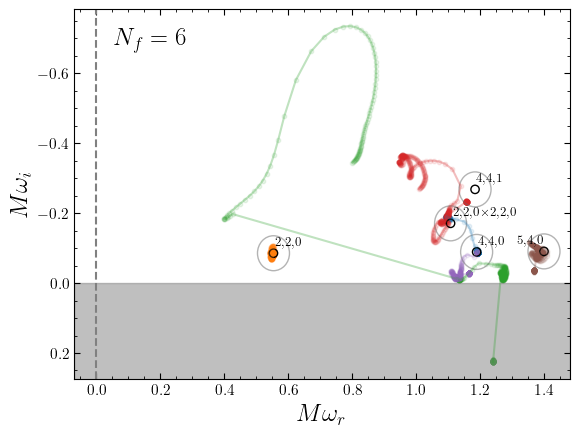

In [120]:
fig, ax = plt.subplots()
plot_omega_free(result_SXS_free, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = False)
plot_predicted_qnms(ax, 
                    passed_modes_SXS,
                    [],
                    ellipse_qnm_list=passed_modes_SXS,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = present_modes_SXS,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )
ax.text(0.08, 0.95, f"$N_f = {N_free_SXS}$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

In [121]:
combined_modes_list = list(set(present_modes_SXS + present_modes_CCE))

In [122]:
# color_dict = {}
# for i, mode in enumerate(combined_modes_list):
#     color_dict[mode] = f'C{i}'

color_dict = {
    '2.2.0': 'C0',
    '2.2.1': 'C1',
    '3.2.0': 'C2',
    '4.2.0': 'C3',
    '3.2.1': 'C4',
    '4.4.0': 'C5',
    '2.2.0x2.2.0': 'C6',
    '4.4.1': 'C7',
    '5.4.0': 'C8',
    'constant': 'C9',
    '2.-99.0x2.2.0': 'gold'
}

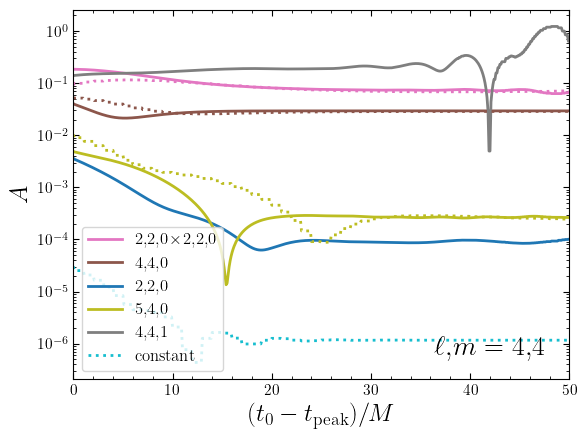

In [123]:
fig, ax = plt.subplots()
plot_amplitudes(fitter_SXS_fixed.result_full, fixed_modes = found_modes_SXS, color_dict = color_dict, ax = ax)
plot_amplitudes(fitter_CCE_fixed.result_full, fixed_modes = found_modes_CCE, color_dict = color_dict, ax = ax,
                ls = ':', A_fac = 2)
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique))

ax.text(0.95, 0.05, f"$\ell{{,}}m = {l}{{,}}{m}$",
            transform=ax.transAxes,
            fontsize=20,
            horizontalalignment='right',
            verticalalignment='bottom')

plt.savefig(PLOT_PATH + f"CCE_{CCE_num}_SXS_{SXS_num}_lm_{l}.{m}_amplitude.pdf", bbox_inches='tight')

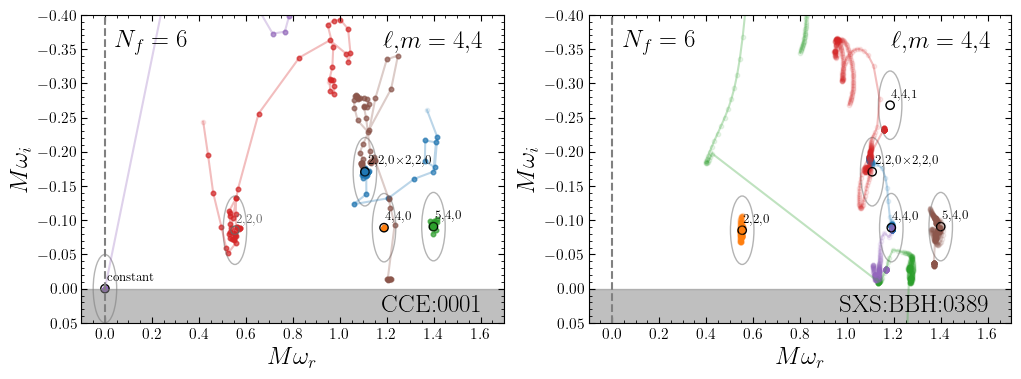

In [126]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
plot_omega_free(result_CCE_free, scatter_size = 10, ax = axs[0], scatter_alpha = 0.1,
                color_indicate = False)
plot_omega_free(result_SXS_free, scatter_size = 10, ax = axs[1], scatter_alpha = 0.1,
                color_indicate = False)
for ax in axs:
#     ax.set_xlim(-0.7, 1.3)
#     ax.set_ylim(0.06, -0.5)
        ax.set_xlim(-0.1, 1.7)
        ax.set_ylim(0.05, -0.4)
plot_predicted_qnms_kwargs = dict(
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    expand_points = (1.1, 1.9)
                                  )
plot_predicted_qnms(axs[0], 
                    passed_modes_CCE,
                    [],
                    ellipse_qnm_list=passed_modes_CCE,
                    present_modes = present_modes_CCE,
                    **plot_predicted_qnms_kwargs
                    )
plot_predicted_qnms(axs[1],
                    passed_modes_SXS,
                    [],
                    ellipse_qnm_list=passed_modes_SXS,
                    present_modes = present_modes_SXS,
                    **plot_predicted_qnms_kwargs)
axs[0].text(0.08, 0.95, f"$N_f = {N_free_CCE}$", 
        transform=axs[0].transAxes, 
        fontsize=18, 
        horizontalalignment='left',
        verticalalignment='top')
axs[0].text(0.95, 0.02, f"CCE:{CCE_num}",
            transform=axs[0].transAxes,
            fontsize=18,
            horizontalalignment='right',
            verticalalignment='bottom')
axs[0].text(0.95, 0.95, f"$\ell{{,}}m = {l}{{,}}{m}$",
            transform=axs[0].transAxes,
            fontsize=18,
            horizontalalignment='right',
            verticalalignment='top')
axs[1].text(0.08, 0.95, f"$N_f = {N_free_SXS}$",
        transform=axs[1].transAxes,
        fontsize=18,
        horizontalalignment='left',
        verticalalignment='top')
axs[1].text(0.95, 0.02, f"SXS:BBH:{SXS_num}",
            transform=axs[1].transAxes,
            fontsize=18,
            horizontalalignment='right',
            verticalalignment='bottom')
axs[1].text(0.95, 0.95, f"$\ell{{,}}m = {l}{{,}}{m}$",
                transform=axs[1].transAxes,
                fontsize=18,
                horizontalalignment='right',
                verticalalignment='top')
plt.savefig(PLOT_PATH + f"CCE_{CCE_num}_SXS_{SXS_num}_lm_{l}.{m}_omega.pdf", bbox_inches='tight')

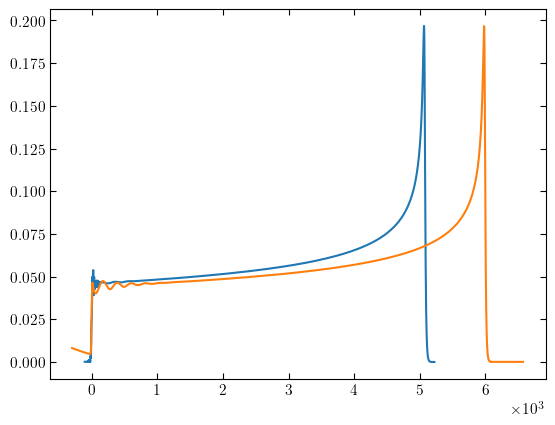

In [42]:
plt.plot(h_SXS.fulltime, np.abs(h_SXS.fullh)*0.5)
plt.plot(h_CCE.fulltime, np.abs(h_CCE.fullh))